<a href="https://colab.research.google.com/github/dssikdar/asdrp_QGAN/blob/try-full-code/Diptanshu_Full_QGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universal
(Imports)

In [1]:
#!pip install tensorflow-quantum
!pip uninstall tensorflow
!pip install tensorflow==2.4.1

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.7.0
     |████████████████████████████████| 394.3 MB 9.0 kB/s 
     |████████████████████████████████| 3.8 MB 27.5 MB/s 
     |████████████████████████████████| 462 kB 35.6 MB/s 
     |████████████████████████████████| 2.9 MB 27.1 MB/s 
     |████████████████████████████████| 132 kB 32.7 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68721 sha256=6e9d9bfcea52f232ff02aa0bdc42dbad53de9f273ac09d2b9da

In [2]:
pip install tensorflow-quantum

In [3]:
import tensorflow as tf
import tensorflow_quantum as tfq

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
import tensorflow.keras.backend as K

In [4]:
from functools import *
import matplotlib.pyplot as plt
import sys
import numpy as np
from sklearn.metrics import mean_squared_error

In [5]:
class RandomWeightedAverage(tf.keras.layers.Layer):
    def __init__(self, batch_size):
        super().__init__()
        self.batch_size = batch_size

    def call(self, inputs, **kwargs):
        alpha = tf.random.uniform((self.batch_size, 1, 1, 1))
        return (alpha * inputs[0]) + ((1 - alpha) * inputs[1])
    
    def compute_output_shape(self, input_shape):
        return input_shape[0]


In [6]:
!pip install cirq

import cirq
import math
import random
import sympy

In [7]:
from cirq.contrib.svg import SVGCircuit

In [32]:
import pandas as pd
df = pd.read_csv("selfies_csv_data.csv")
dataset = pd.DataFrame(df)
dataset.drop("Unnamed: 0", axis=1, inplace=True)
dataset.head()

,selfies,Solubility
0,[Br-1].[C][C][C][C][C][C][C][C][C][C][C][C][C]...,-3.616127
1,[O][=C][N][C][=C][C][=C][C][=C][C][=C][C][Ring...,-3.254767
2,[Cl][C][=C][C][=C][Branch1][Ring1][C][=O][C][=...,-2.177078
3,[Zn+2].[C][C][Branch1][=Branch2][C][=C][C][=C]...,-3.924409
4,[C][O][C][Ring1][Ring1][C][N][Branch1][#Branch...,-4.662065


In [26]:
class QuantumGenerator:
    def __init__(self, NOQ):
        self.num_of_qubits = NOQ
        self.G = None

    def useless_function(self, bits=None):
        circuit = cirq.Circuit()
        return circuit

    def init_rot(self, bits):
        circuit = cirq.Circuit()
        for bit in bits:
            circuit.append(cirq.rx(np.pi)(bit))
            circuit.append(cirq.ry(np.pi)(bit))
            circuit.append(cirq.rz(np.pi)(bit))
        return circuit
    
    def connect_all(self, bits, symbols):
        circuit = cirq.Circuit()
        i = 0
        circuit.append(cirq.H.on_each(bits))
        for control, target in zip(bits, bits[1:]+[bits[0]]):
            circuit.append(cirq.CNOT(control=control, target=target))
            circuit.append(cirq.rx(symbols[i])(control))
            circuit.append(cirq.rx(symbols[i])(target))
        return circuit

    def create_qgan_model(self, qubits, layers=1):
        symbols = sympy.symbols('gen_param0:4')
        qgan_circuit = cirq.Circuit()
        x = 0
        for layer in range(layers):
            qgan_circuit += self.init_rot(qubits)
            qgan_circuit += self.connect_all(qubits, symbols[x:x+4])
            x += 4
        return qgan_circuit

    def build(self):
        qgan_bits = cirq.GridQubit.rect(1,self.num_of_qubits)
        readout_ops = cirq.Z(qgan_bits[0])
        useless_input = tf.keras.Input(shape=(), dtype=tf.dtypes.string)
        init_state = tfq.layers.AddCircuit()(useless_input, prepend=self.useless_function(qgan_bits))
        quantum_model = tfq.layers.PQC(self.create_qgan_model(qgan_bits), readout_ops)(init_state)
        self.G = tf.keras.Model(inputs=[useless_input], outputs=[quantum_model])
        tf.keras.utils.plot_model(self.G, show_shapes=True, show_layer_names=False, dpi=70)

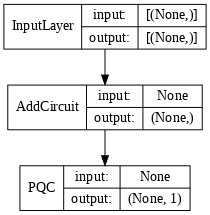

In [27]:
Gen = QuantumGenerator(4)
Gen.build()
tf.keras.utils.plot_model(Gen.G, show_shapes=True, show_layer_names=False, dpi=70)

In [ ]:
class classicalDiscriminator: 
    def __init__(self):

    def build_critic(self):
        model = Sequential()
        model.add(Conv2D(16, kernel_size=3, strides=2, input_shape=self.mol_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(16, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(32, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1))

        #model.summary()

        molecule = Input(shape=self.mol_shape)
        validity = model(molecule)

        return Model(molecule, validity)

In [52]:
class QGAN():
    def __init__(self):
        self.mol_vec_size = (16, 1, 1)
        self.mol_shape = (self.mol_vec_size)
        self.latent_dim = 16
        
        self.n_critic = 5
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00005)
        
        self.generator = QuantumGenerator(self.latent_dim)
        self.generator.build()
        self.critic = self.build_critic()
        
        
        # Freeze generator's layers while training critic
        self.generator.trainable = False
        
        # Molecule Vector input (real sample)
        real_mol = Input(shape=self.mol_shape)
        
        # Noise input
        z_disc = Input(shape=(self.latent_dim,))
        # Generator molecule (fake sample)
        fake_mol = self.generator(z_disc)
        
        # Discriminator determines validity of the real and fake molecules
        fake = self.critic(fake_mol)
        valid = self.critic(real_mol)
        
        # Construct weighted average
        interpolated_mol = RandomWeightedAverage()([real_mol, fake_mol])
        # Determine validity of weighted sample
        validity_interpolated = self.critic(interpolated_mol)
        
        # Use Python partial to provide loss function 
        partial_gp_loss = partial(self.gradient_penalty_loss, averaged_samples=interpolated_mol)
        partial_gp_loss.__name__ = 'gradient_penalty' 

        self.critic_model = Model(inputs=[real_mol, z_disc], outputs=[valid, fake, validity_interpolated])
        self.critic_model.compile(loss=[self.loss, self.loss, partial_gp_loss], optimizer=optimizer)
        
        # Construct Computational Graph
        self.critic.trainable = False
        self.generator.trainable = True

        #Quantumize This
        #THIS STUFF NEEDS WORK
        # Sampled noise for input to generator
        z_gen = Input(shape=(self.latent_dim,))
        # Generate images based of noise
        mol = self.generator(z_gen)
        # Discriminator determines validity
        valid = self.critic(mol)
        # Defines generator model
        self.generator_model = Model(z_gen, valid)
        self.generator_model.compile(loss=self.loss, optimizer=optimizer) 
        
    def gradient_penalty_loss(self, y_true, y_pred, averaged_samples):
        """
        Computes gradient penalty based on prediction and weighted real / fake samples
        """
        gradients = K.gradients(y_pred, averaged_samples)[0]
        gradients_sqr = K.square(gradients)
        gradients_sqr_sum = K.sum(gradients_sqr,
                                  axis=np.arange(1, len(gradients_sqr.shape)))
        gradient_l2_norm = K.sqrt(gradients_sqr_sum)
        gradient_penalty = K.square(1 - gradient_l2_norm)
        return K.mean(gradient_penalty)
    
    def loss(self, y_true, y_pred):
        return mean_squared_error(y_true, y_pred)
        
    #def build_critic(self):
     
    def train(self, epochs, batch_size, dataset, sample_interval=50):
        # Load the dataset
        #(X_train, _), (_, _) = dataset
        (X_train) = dataset
        
        self.latent_dim = 16

        # Adversarial Ground Truths
        valid = -np.ones((batch_size, 1))
        fake = np.ones((batch_size, 1))
        dummy = np.zeros((batch_size, 1)) 
        for epoch in range(epochs):
            for _ in range(2):
                #---------------------------#
                #  Train the Discriminator  #
                #---------------------------#
                
                # Select a random batch of molecules 
                #print(X_train["Solubility"][1])
                idx = np.random.randint(0, len(X_train["Solubility"]), batch_size)
                print(idx)
                molecule = X_train["Solubility"][idx]
                # Sample Generator Input
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                # Train the critic
                d_loss = self.critic_model.train_on_batch([molecule, noise], [valid, fake, dummy])
            
            
            #-----------------------#
            #  Train the Generator  #
            #-----------------------#
            g_loss = self.generator_model.train_on_batch(noise, valid)
            
            # Plot the progress
            print("%d [D loss: %f] [G loss: %f]" % (epoch, d_loss[0], g_loss))

In [53]:
qgan = QGAN
print(qgan)
qgan.train(qgan, epochs=20, batch_size=4, dataset=dataset)

<class '__main__.QGAN'>
[8141 6771 2430 6761]


AttributeError: ignored

In [49]:
class check:
    def __init__(self, color):
        print("Address of self = ",id(self))
        self.color = "red"
    def write(self):
        print("hello")
 
obj = check
obj.write(obj)

hello
